In [1]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from pathlib import Path
import os
train_dir = Path(r"C:\Users\lamya\SIC Project\Dataset\final_dataset\train")
val_dir = Path(r"C:\Users\lamya\SIC Project\Dataset\final_dataset\val")

print("Path exists?", train_dir.exists())     
print("Classes found in dataset folder:", os.listdir(train_dir))
print("Path exists?", val_dir.exists())     
print("Classes found in dataset folder:", os.listdir(val_dir))

Path exists? True
Classes found in dataset folder: ['Caution', 'Safe', 'Unsafe']
Path exists? True
Classes found in dataset folder: ['Caution', 'Safe', 'Unsafe']


In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

def normalize(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)


Found 2250 files belonging to 3 classes.
Found 247 files belonging to 3 classes.


In [4]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet",
    pooling="avg"
)

# Freeze base model
base_model.trainable = False

model = Sequential([
    base_model,
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')   
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 270ms/step - accuracy: 0.4107 - loss: 1.2200 - val_accuracy: 0.6356 - val_loss: 0.8690
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.5813 - loss: 0.9151 - val_accuracy: 0.6721 - val_loss: 0.7817
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - accuracy: 0.6240 - loss: 0.8373 - val_accuracy: 0.6964 - val_loss: 0.7428
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 257ms/step - accuracy: 0.6591 - loss: 0.7846 - val_accuracy: 0.7166 - val_loss: 0.7250
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 256ms/step - accuracy: 0.6938 - loss: 0.7385 - val_accuracy: 0.7449 - val_loss: 0.6922
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 257ms/step - accuracy: 0.7049 - loss: 0.6979 - val_accuracy: 0.7449 - val_loss: 0.6781
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.7240 - loss: 0.6728 - val_accuracy: 0.7530 - val_loss: 0.6485
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - accuracy: 0.7258 - loss: 0.6652 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Found 2250 files belonging to 3 classes.
              precision    recall  f1-score   support

     Caution       0.80      0.88      0.84        83
        Safe       0.84      0.74      0.79        80
      Unsafe       0.77      0.79      0.78        84

    accuracy                           0.80       247
   macro avg       0.80      0.80      0.80       247
weighted avg       0.80      0.80      0.80       247



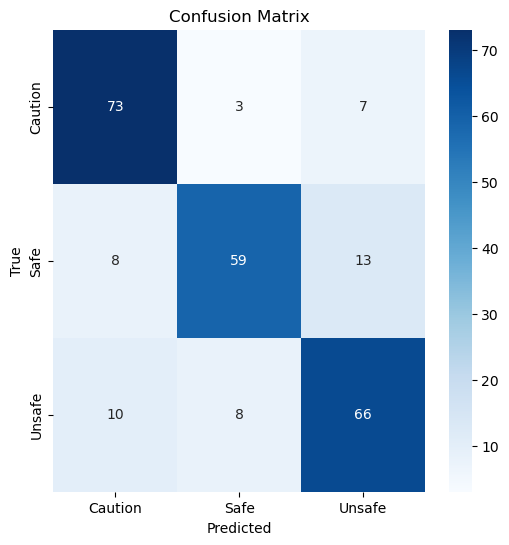

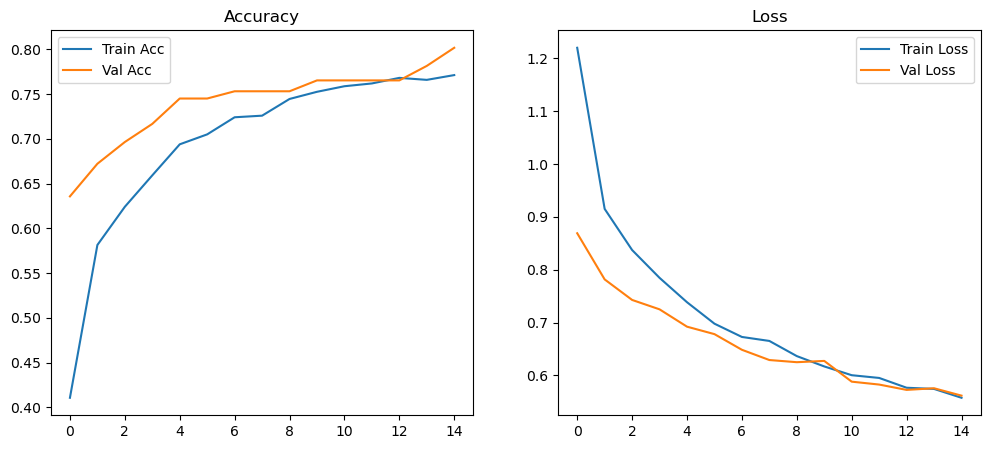

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

class_names = training_ds.class_names
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
class_names = training_ds.class_names

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


In [11]:
base_model.trainable = True
for layer in base_model.layers[:-40]:  
    layer.trainable = False


In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer = Adam(1e-5),  
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [13]:
history_fine = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 15,   
)

Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 399ms/step - accuracy: 0.9187 - loss: 0.2335 - val_accuracy: 0.7328 - val_loss: 0.6706
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 27s 383ms/step - accuracy: 0.9200 - loss: 0.2198 - val_accuracy: 0.7449 - val_loss: 0.6436
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 389ms/step - accuracy: 0.9302 - loss: 0.2043 - val_accuracy: 0.7287 - val_loss: 0.6430
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 395ms/step - accuracy: 0.9391 - loss: 0.1895 - val_accuracy: 0.7368 - val_loss: 0.6393
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 351ms/step - accuracy: 0.9356 - loss: 0.1827 - val_accuracy: 0.7652 - val_loss: 0.6353
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 371ms/step - accuracy: 0.9360 - loss: 0.1744 - val_accuracy: 0.7773 - val_loss: 0.5932
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 345ms/step - accuracy: 0.9449 - loss: 0.1512 - val_accuracy: 0.7733 - val_loss: 0.5928
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 363ms/step - accuracy: 0.9396 - loss: 0.1542 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Found 2250 files belonging to 3 classes.
              precision    recall  f1-score   support

     Caution       0.82      0.86      0.84        83
        Safe       0.76      0.81      0.78        80
      Unsafe       0.82      0.73      0.77        84

    accuracy                           0.80       247
   macro avg       0.80      0.80      0.80       247
weighted avg       0.80      0.80      0.80       247



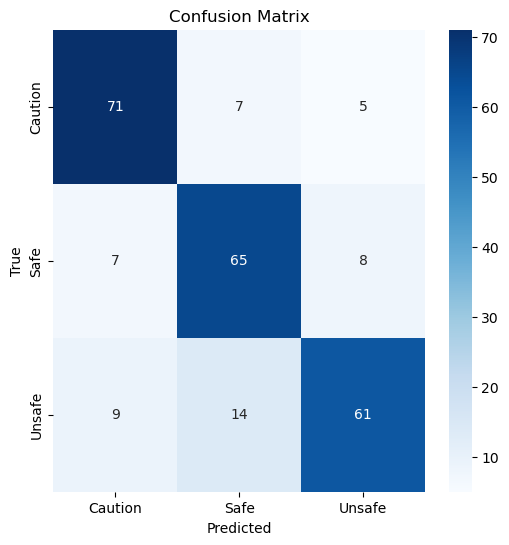

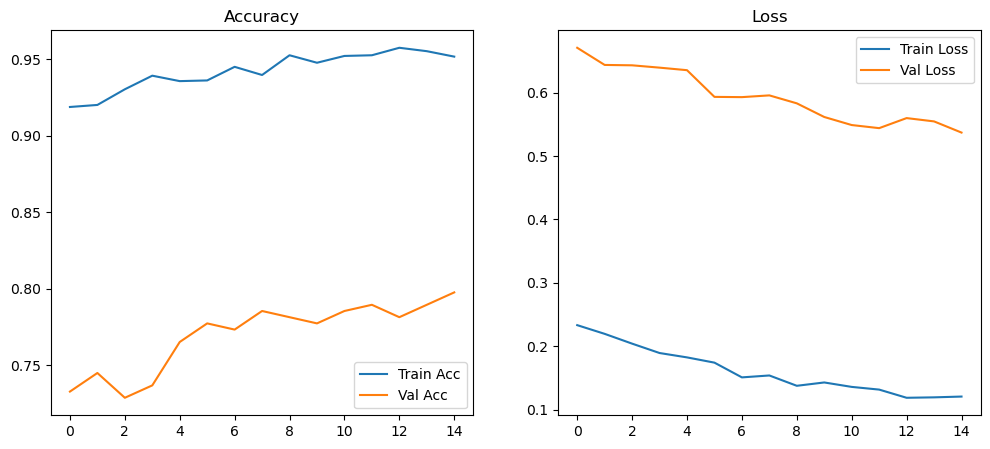

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

class_names = training_ds.class_names
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
class_names = training_ds.class_names

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


In [15]:
model.save("final_model.h5")
